In [1]:
import tensorflow as tf
import jpeg_related_functions as jrf
from PIL import Image

In [2]:
import numpy as np
q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 103, 99]])
q = q.astype('float64')/255.

In [3]:

lmbda = 0.4
rho = 0.1
alpha = 1.4
noi = 5
image = Image.open("20190728_matthewdruincom_SLE_0033.jpg")
s = np.asarray(image).astype('float64')/255.
s = s[slice(0,1600),slice(0,2800),slice(None)]
s = np.reshape(s,(1,) + s.shape)
fftSz = s.shape[1:3]
smooth_jpeg = jrf.Smooth_JPEG(q,lmbda,rho,alpha,noi,fftSz,dtype=tf.float64)
#y,u,By,negC = smooth_jpeg.init_vars(s)
lowpass = smooth_jpeg(s)


In [4]:
highpass.shape

TensorShape([1, 1600, 2800, 3])

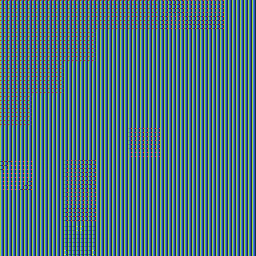

In [10]:
x = tf.cast(highpass,tf.float32)
x_small = x[slice(None),slice(0,256),slice(0,256),slice(None)]
Image.fromarray(np.asarray(tf.reshape(x_small,x_small.shape[1:])),'RGB')

In [5]:
QWs = [smooth_jpeg.q*tf.math.round(Ws[channel]/smooth_jpeg.q) for channel in range(len(Ws))]

In [6]:
print(len(QWs))

3


In [3]:
from PIL import Image
image = Image.open("20190728_matthewdruincom_SLE_0033.jpg")
#image = Image.open("20200202_matthewdruincom_SLW_0085.jpg")
#image.show()
import numpy as np
x_orig = np.asarray(image).astype('float64')

x_batch = np.reshape(x_orig.astype('float64')/255.,(1,)+x_orig.shape)
x_batch = x_batch[slice(None),slice(0,1600),slice(0,2800),slice(None)]
x = (np.reshape(x_batch,x_batch.shape[1:])*255.).astype('uint8')
x_orig = Image.fromarray(x)
x_cmprss = tf.image.adjust_jpeg_quality(x,25)
image_cmprss = Image.fromarray(np.asarray(x_cmprss),'RGB')
image_cmprss.show()
x_cmprss_batch = np.reshape(np.asarray(x_cmprss).astype('float64')/255.,(1,)+x_cmprss.shape)
#x_cmprss_apprx = jrf.Linear_JPEG_Compression_Approx(x_cmprss_batch)(x_batch)
#image_cmprss_apprx = Image.fromarray(np.asarray(x_cmprss_apprx*255).astype('uint8'),'RGB')
#image_cmprss_apprx.show

#y = jpeg_coef2rgb(rgb2jpeg_coef(x))
#z = jpeg_coef2rgb(rgb2jpeg_coef(x))

In [4]:
print(x_batch.shape)
print(x_cmprss_batch.shape)

(1, 1600, 2800, 3)
(1, 1600, 2800, 3)


In [4]:
x_cmprss_apprx = jrf.Linear_JPEG_Compression_Approx(x_cmprss_batch,epsilon=1e-3)(x_batch)
#print(tf.math.reduce_min(tf.where(jrf.Linear_JPEG_Compression_Approx(x_cmprss_batch).masky,1.0,0.0)))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [5]:
image_cmprss_apprx = Image.fromarray(np.asarray(tf.reshape(x_cmprss_apprx,x_cmprss_apprx.shape[1:])*255).astype('uint8'),'RGB')
image_cmprss_apprx.show()

In [6]:
print(tf.math.reduce_max(x_cmprss_apprx))

tf.Tensor(1.0698118, shape=(), dtype=float32)


In [7]:
tf.math.reduce_min(y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.0>

In [4]:
print(tf.math.reduce_max(tf.math.abs(x - y)))
print(tf.math.reduce_max(tf.math.abs(z - y)))

tf.Tensor(0.21713108, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [5]:
x.shape

TensorShape([5, 128, 128, 3])

In [5]:
x[0,0,0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.22571766>

In [6]:
y[0,0,0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.4955484>